# Delta Equity 90 Days

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4738      184606-3434649.5000     -4.2000      0.0000    211.4470      7.50004434737.9000  26860.4872 


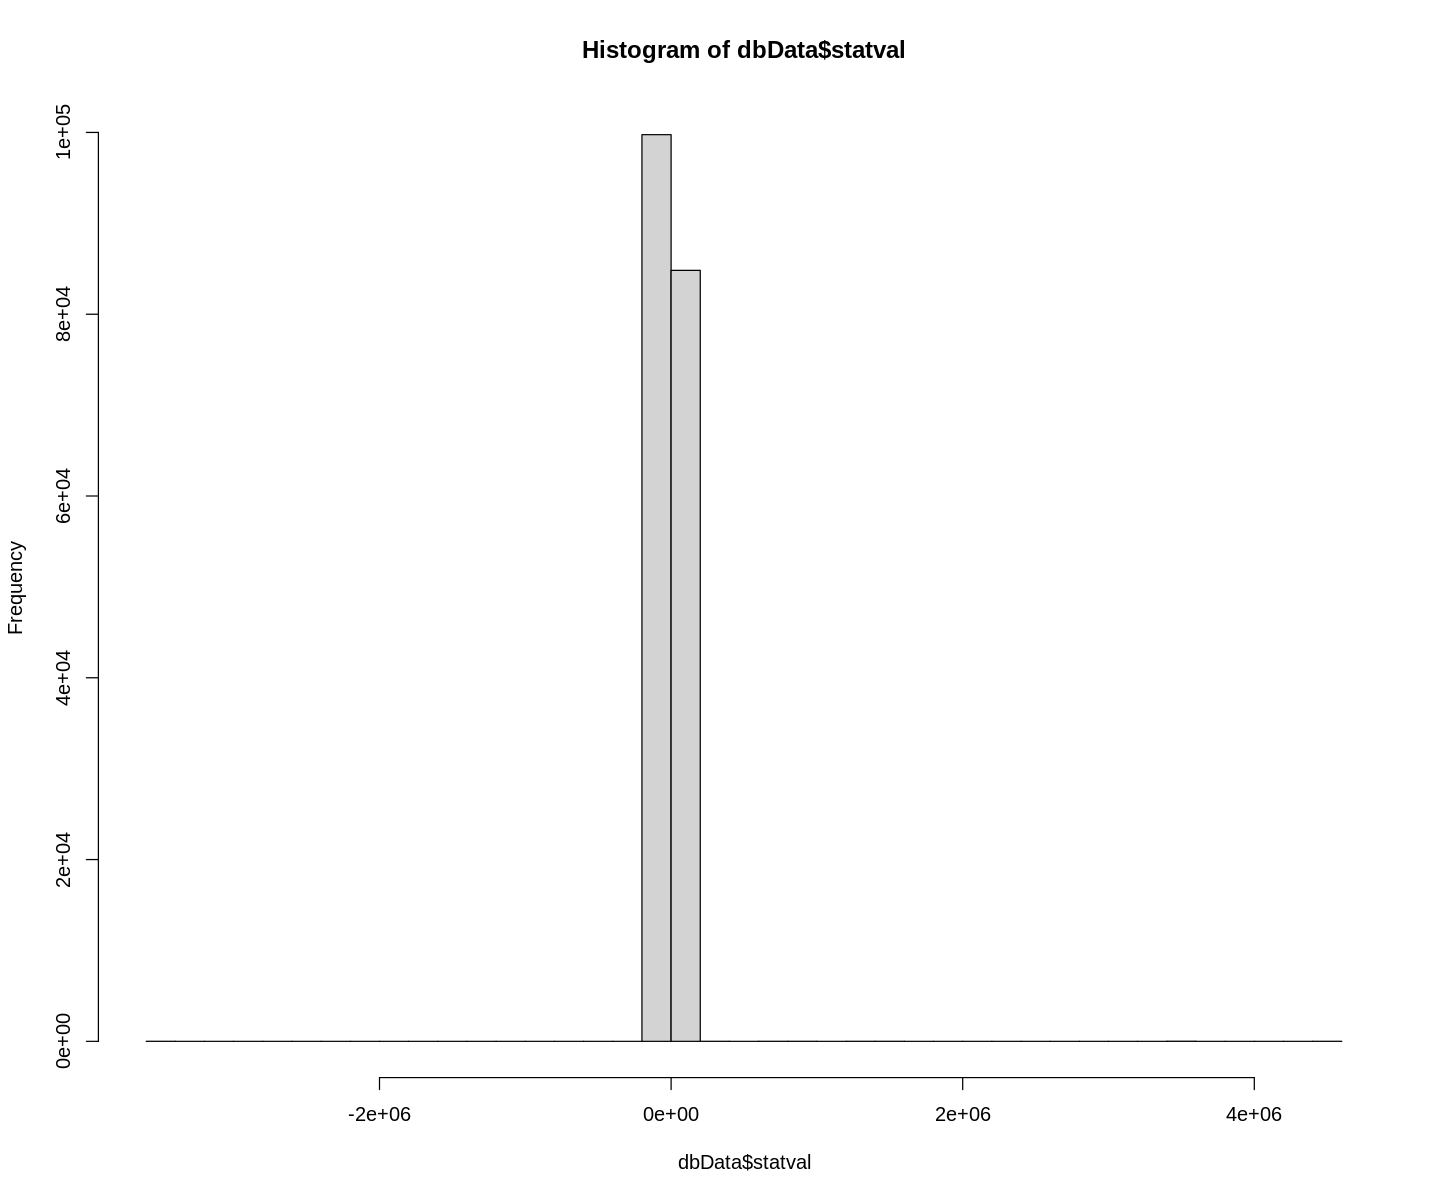

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp90'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4440      171859    -50.0000     -3.5000      0.0000      1.2150      6.6000     50.0000     13.8649 


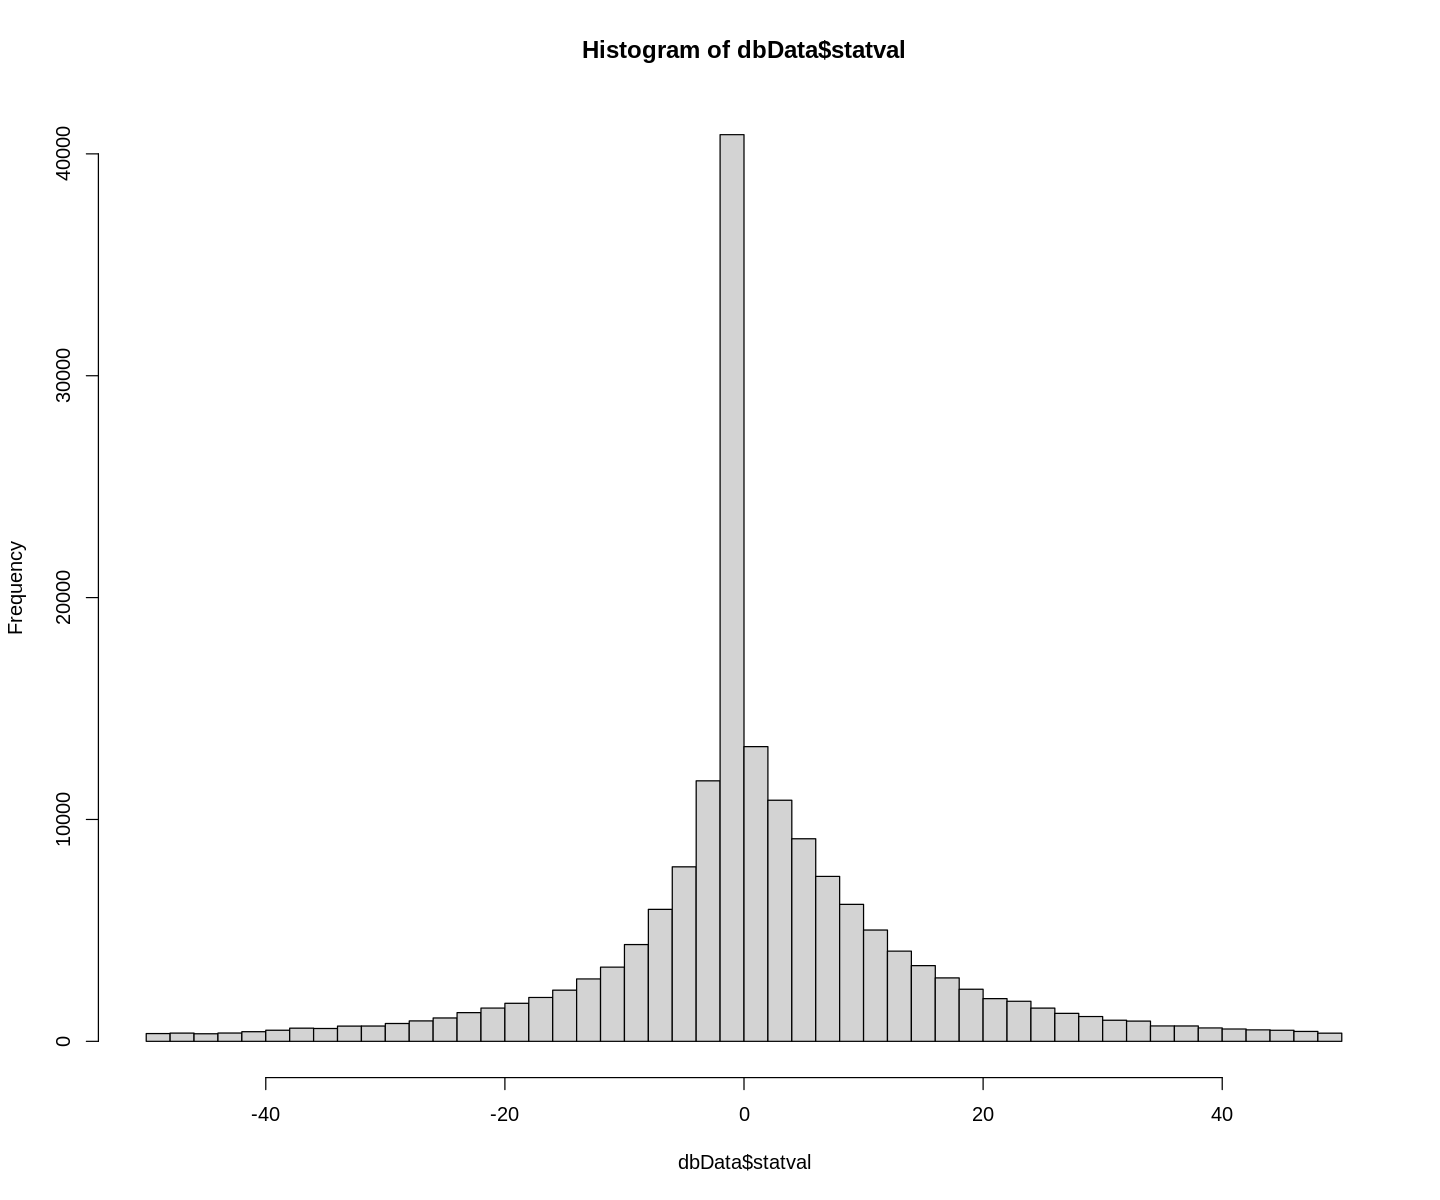

In [3]:
# Delta equity 90 days (3 month). Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp90' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2042       64160    -15.0000     -1.7000      1.5000      4.4817      9.1000     50.0000     10.8938 


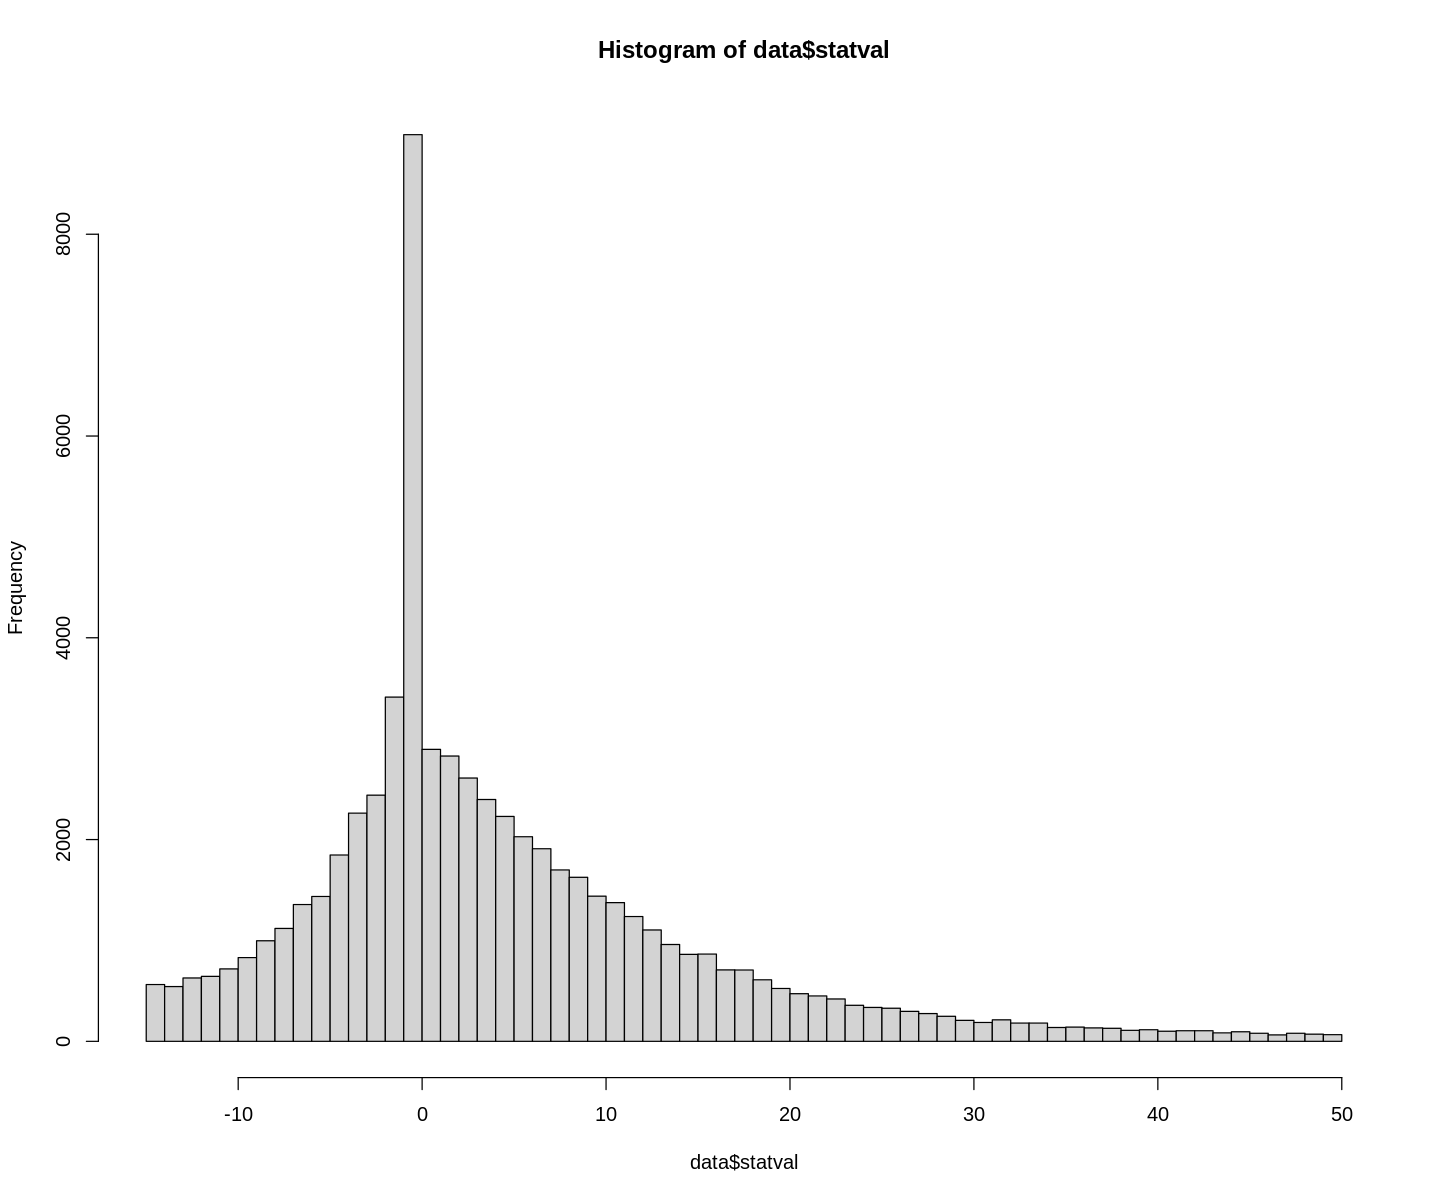

In [4]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2042       64160    -15.0000     -1.7000      1.5000      4.4817      9.1000     50.0000     10.8938 



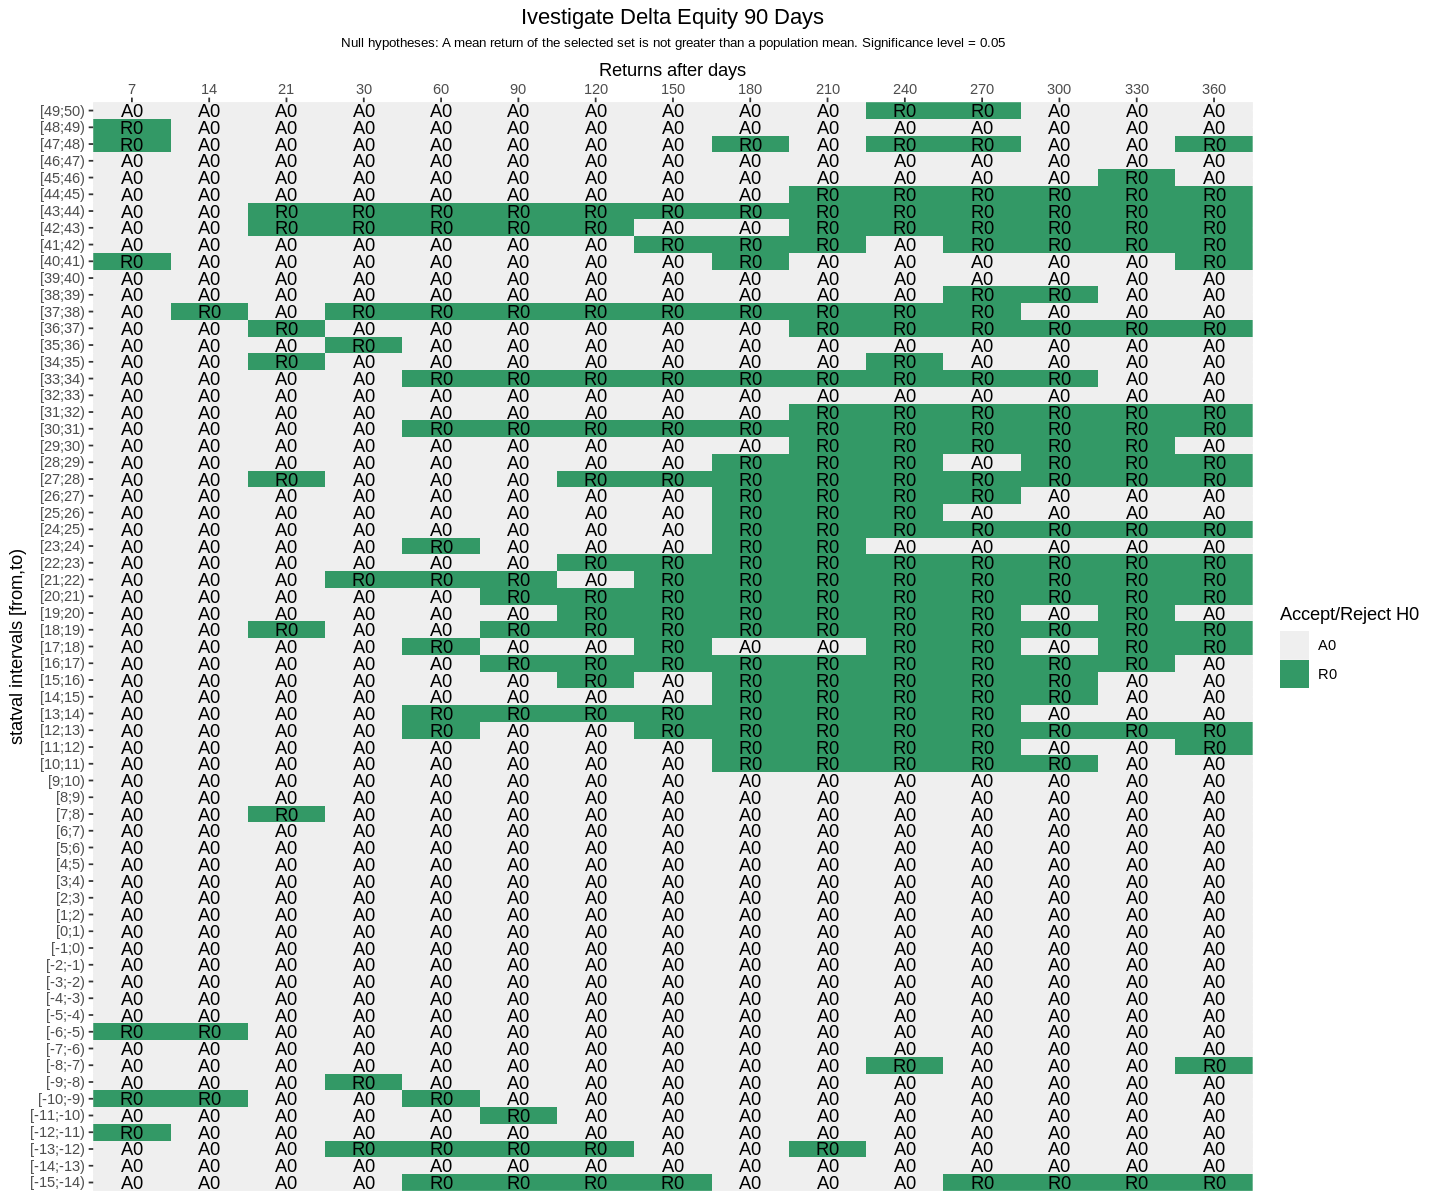

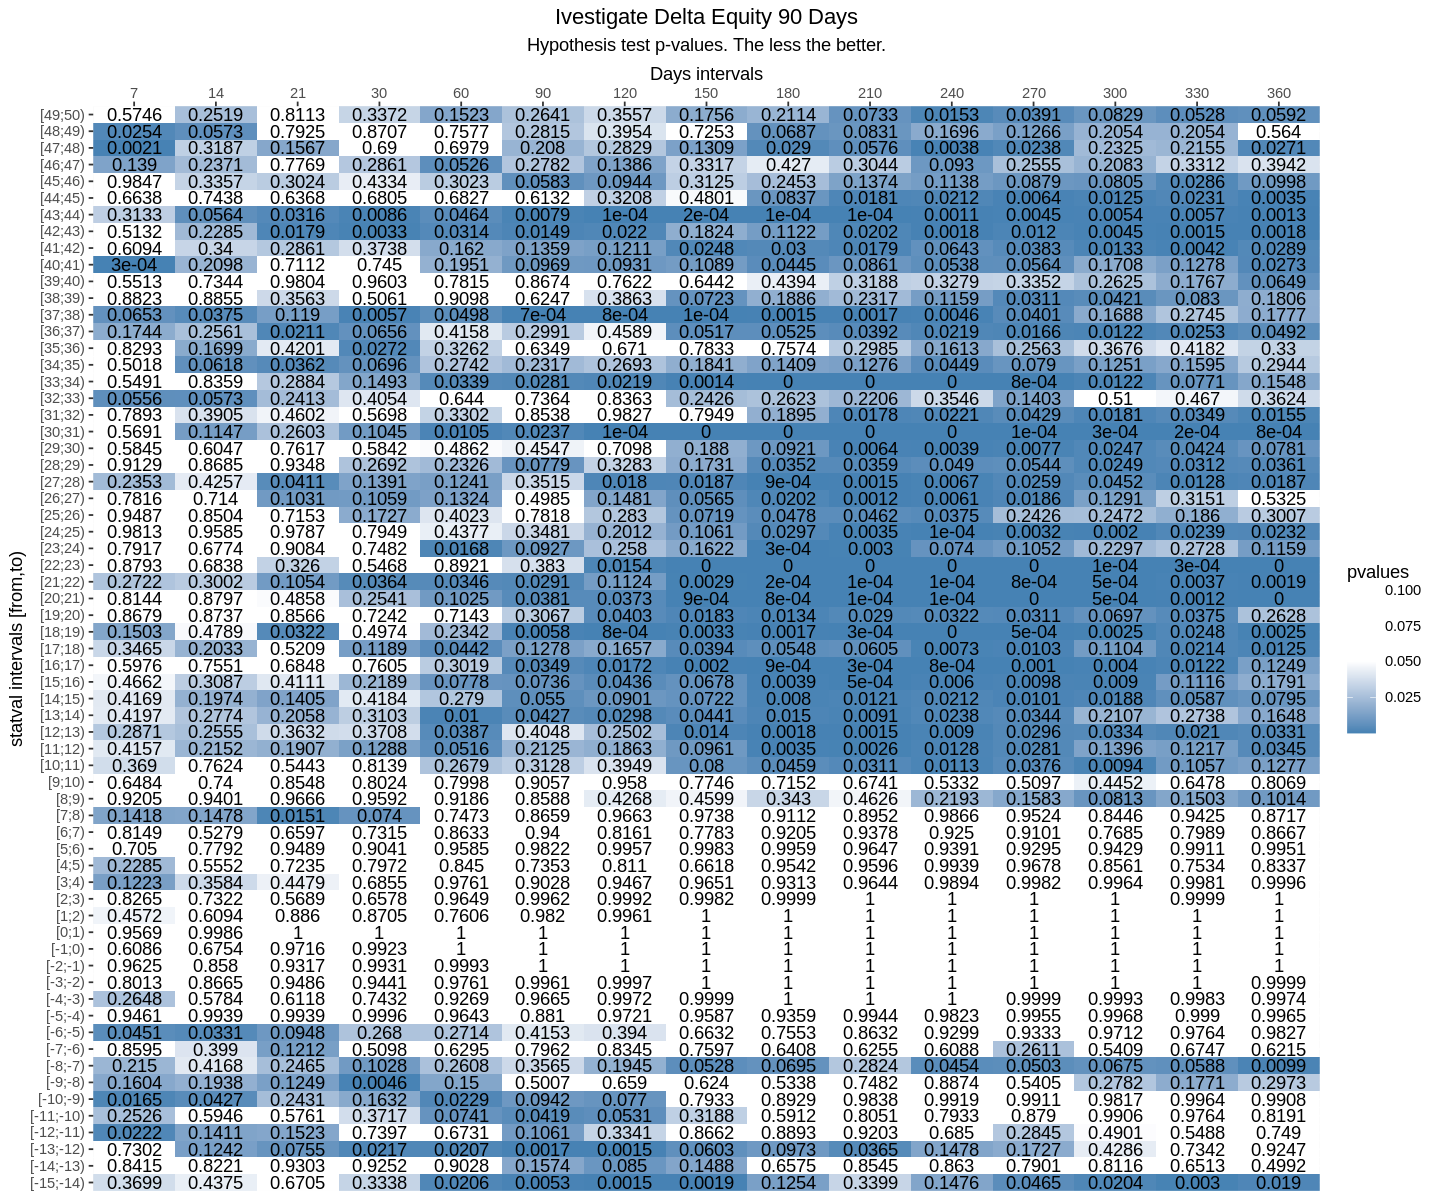

In [5]:
experiment = list(
  name = "deltaequityp90",
  description = "Ivestigate Delta Equity 90 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


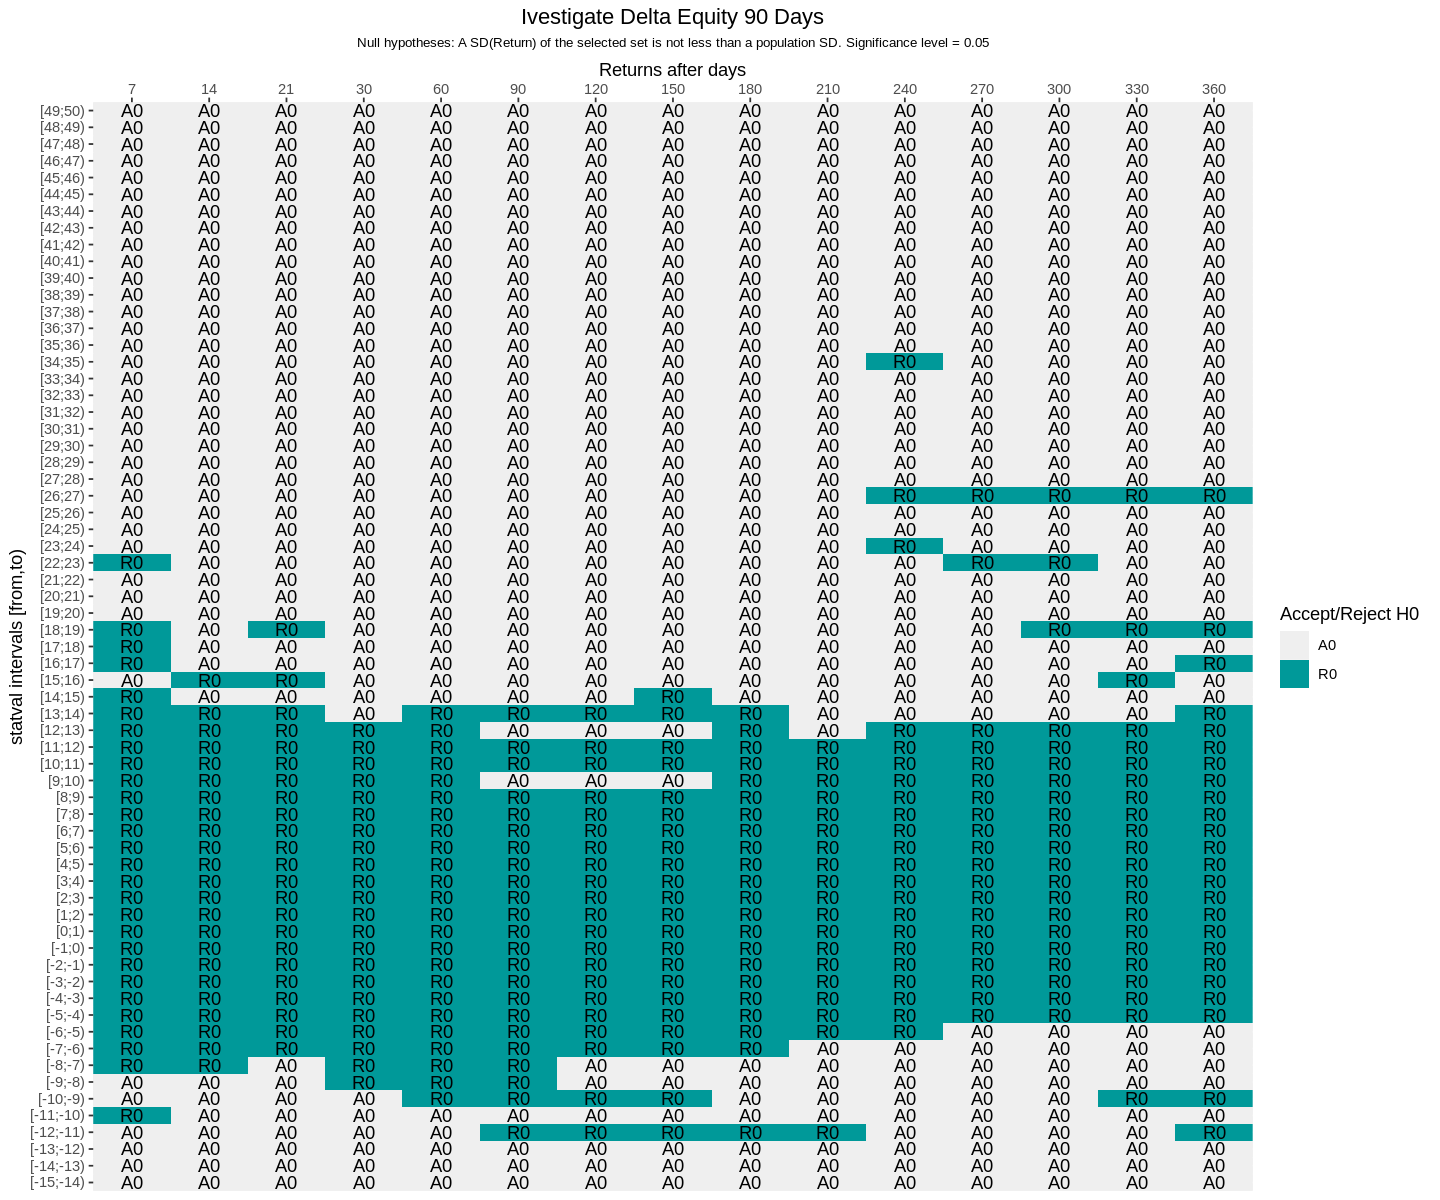

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    61     60     58     58     48     45     42     37   
2  48 <= statval < 49    71     70     69     68     64     59     55     54   
3  47 <= statval < 48    83     80     78     77     70     63     56     54   
4  46 <= statval < 47    57     56     55     53     44     43     39     37   
5  45 <= statval < 46    82     79     79     78     74     69     60     56   
6  44 <= statval < 45    98     97     94     90     81     74     71     67   
7  43 <= statval < 44    79     79     77     76     69     64     59     55   
8  42 <= statval < 43    99     97     94     92     87     81     75     70   
9  41 <= statval < 42   106    104    100     97     89     83     76     66   
10 40 <= statval < 41    99     98     95     94     83     72     66     60   
11 39 <= statval < 40   118    112    108    103     98     89     84     79   
12 38 <= statval < 39   103    102    101     98     90     80     74     67   
13 37 <= statval < 38   134    134    132    126    117    105    101     90   
14 36 <= statval < 37   127    126    122    118    110    103     93     86   
15 35 <= statval < 36   136    131    127    122    111    104     94     83   
16 34 <= statval < 35   141    137    137    133    124    114    105     99   
17 33 <= statval < 34   181    177    174    172    156    142    133    128   
18 32 <= statval < 33   174    170    170    167    155    144    129    112   
19 31 <= statval < 32   213    210    206    201    181    168    160    136   
20 30 <= statval < 31   175    170    165    161    145    141    129    122   
21 29 <= statval < 30   214    212    209    202    186    169    159    138   
22 28 <= statval < 29   250    248    244    238    219    203    197    178   
23 27 <= statval < 28   271    269    263    261    238    220    202    183   
24 26 <= statval < 27   285    283    275    264    245    226    205    182   
25 25 <= statval < 26   335    332    325    314    283    264    235    215   
26 24 <= statval < 25   328    321    311    304    277    252    232    217   
27 23 <= statval < 24   351    342    336    325    288    265    243    218   
28 22 <= statval < 23   412    405    394    382    354    323    291    274   
29 21 <= statval < 22   450    440    430    420    387    349    322    298   
30 20 <= statval < 21   482    474    469    457    405    373    340    313   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    851    827    804    785    703    629    565    516  
37 13 <= statval < 14    973    954    938    921    831    763    675    621  
38 12 <= statval < 13   1071   1052   1030   1011    915    832    758    688  
39 11 <= statval < 12   1250   1231   1208   1162   1042    935    832    754  
40 10 <= statval < 11   1370   1345   1310   1278   1158   1048    940    846  
41 9 <= statval < 10    1415   1383   1353   1315   1173   1071    948    851  
42 8 <= statval < 9     1590   1567   1532   1482   1333   1200   1086    974  
43 7 <= statval < 8     1694   1652   1613   1571   1410   1261   1128   1018  
44 6 <= statval < 7     1877   1824   1785   1724   1550   1379   1242   1123  
45 5 <= statval < 6     2005   1964   1902   1846   1651   1483   1306   1182  
46 4 <= statval < 5     2176   2124   2081   2021   1820   1632   1459   1333  
47 3 <= statval < 4     2391   2349   2304   2242   2003   1798   1590   1460  
48 2 <= statval < 3     2615   2550   2479   2411   2192   1988   1776   1609  
49 1 <= statval < 2     2727   2655   2592   2515   2211   1965   1748   1600  
50 0 <= statval < 1     6697   6587   6459   6281   5746   5308   4896   4512  
51 -1 <= statval < 0    5031   4871   4704   4531   4042   3612   3223   2880  
52 -2 <= statval < -1   3146   3028   2930   2803   2460   2188   1921   1692  
53 -3 <= statval < -2   2389   2299   2235   2131   1886   1667   1461   1320  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



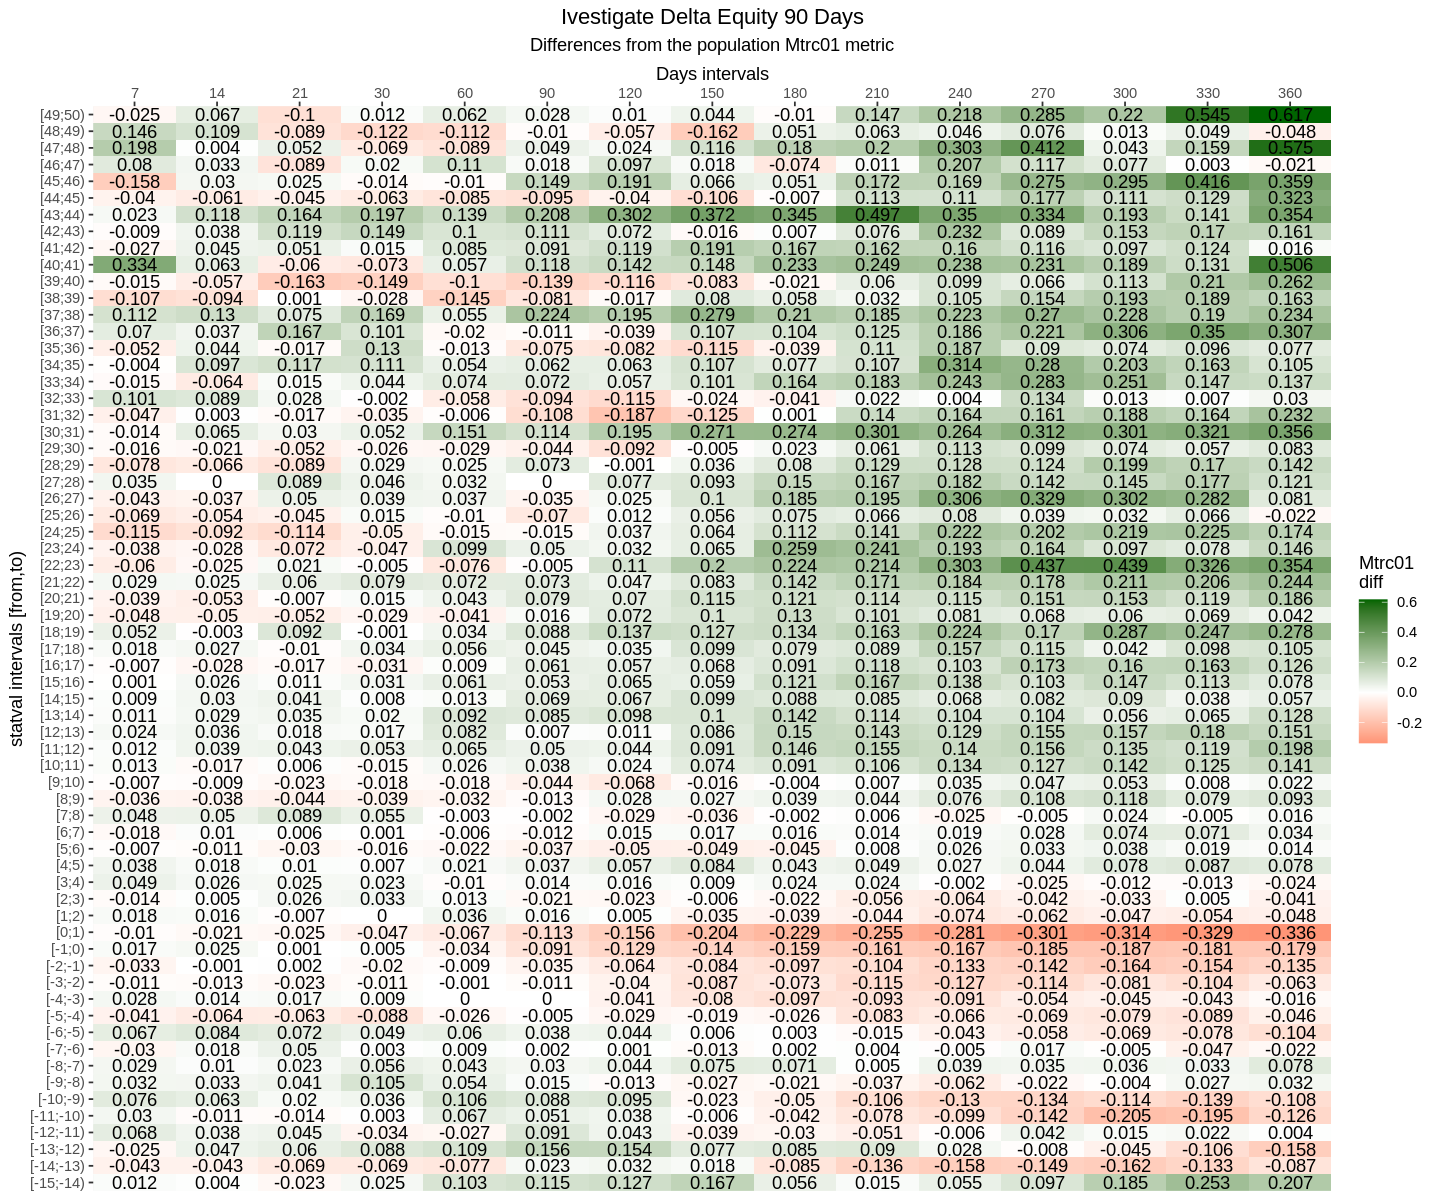

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    51     50     48     48     38     35     33     28   
2  48 <= statval < 49    59     58     57     56     52     49     45     44   
3  47 <= statval < 48    70     67     65     64     57     50     43     42   
4  46 <= statval < 47    54     53     52     50     41     40     36     34   
5  45 <= statval < 46    71     68     68     67     63     59     51     48   
6  44 <= statval < 45    77     77     75     71     63     56     53     50   
7  43 <= statval < 44    70     70     68     67     60     55     51     47   
8  42 <= statval < 43    82     81     78     76     72     68     62     58   
9  41 <= statval < 42    83     82     78     75     67     63     57     51   
10 40 <= statval < 41    82     81     78     78     69     58     55     50   
11 39 <= statval < 40    99     94     90     85     80     73     68     65   
12 38 <= statval < 39    83     82     81     78     72     66     60     55   
13 37 <= statval < 38   106    106    105     99     90     81     78     69   
14 36 <= statval < 37    99     98     94     92     85     79     71     65   
15 35 <= statval < 36   100     96     94     92     85     81     74     66   
16 34 <= statval < 35   110    106    106    102     95     86     80     76   
17 33 <= statval < 34   131    128    126    124    111    101     95     92   
18 32 <= statval < 33   137    133    133    131    119    111    100     85   
19 31 <= statval < 32   157    155    153    149    132    121    115     98   
20 30 <= statval < 31   138    134    131    127    111    108     98     93   
21 29 <= statval < 30   157    155    154    147    133    120    112    100   
22 28 <= statval < 29   181    179    175    169    154    142    136    123   
23 27 <= statval < 28   196    195    190    189    168    155    142    127   
24 26 <= statval < 27   209    207    201    193    183    166    155    138   
25 25 <= statval < 26   227    224    219    210    189    173    155    144   
26 24 <= statval < 25   216    210    201    196    178    162    147    136   
27 23 <= statval < 24   245    238    233    225    202    181    165    150   
28 22 <= statval < 23   261    256    248    237    219    198    175    165   
29 21 <= statval < 22   275    269    262    254    231    206    188    171   
30 20 <= statval < 21   297    292    289    278    243    222    205    187   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15   463    449    435    423    377    335    305    275   
37 13 <= statval < 14   482    476    467    458    411    375    335    309   
38 12 <= statval < 13   501    490    476    463    414    362    329    306   
39 11 <= statval < 12   568    559    546    520    464    409    370    332   
40 10 <= statval < 11   581    569    553    537    481    437    394    352   
41 9 <= statval < 10    616    602    593    573    500    450    396    350   
42 8 <= statval < 9     655    645    629    604    536    471    423    383   
43 7 <= statval < 8     683    665    647    627    555    494    437    388   
44 6 <= statval < 7     727    702    686    657    577    508    442    392   
45 5 <= statval < 6     748    731    710    688    609    538    473    419   
46 4 <= statval < 5     771    742    724    702    623    543    487    436   
47 3 <= statval < 4     789    767    747    727    632    567    497    452   
48 2 <= statval < 3     813    784    763    734    653    589    522    460   
49 1 <= statval < 2     834    812    787    756    651    560    491    441   
50 0 <= statval < 1     902    878    849    805    690    619    551    482   
51 -1 <= statval < 0    950    912    880    846    732    635    558    488   
52 -2 <= statval < -1   844    804    774    732    639    569    487    434   
53 -3 <= statval < -2   782    746    724    679    594    516    448    397   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much. 

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2042       64155    -15.0000     -1.7000      1.5000      4.4814      9.1000     50.0000     10.8940 


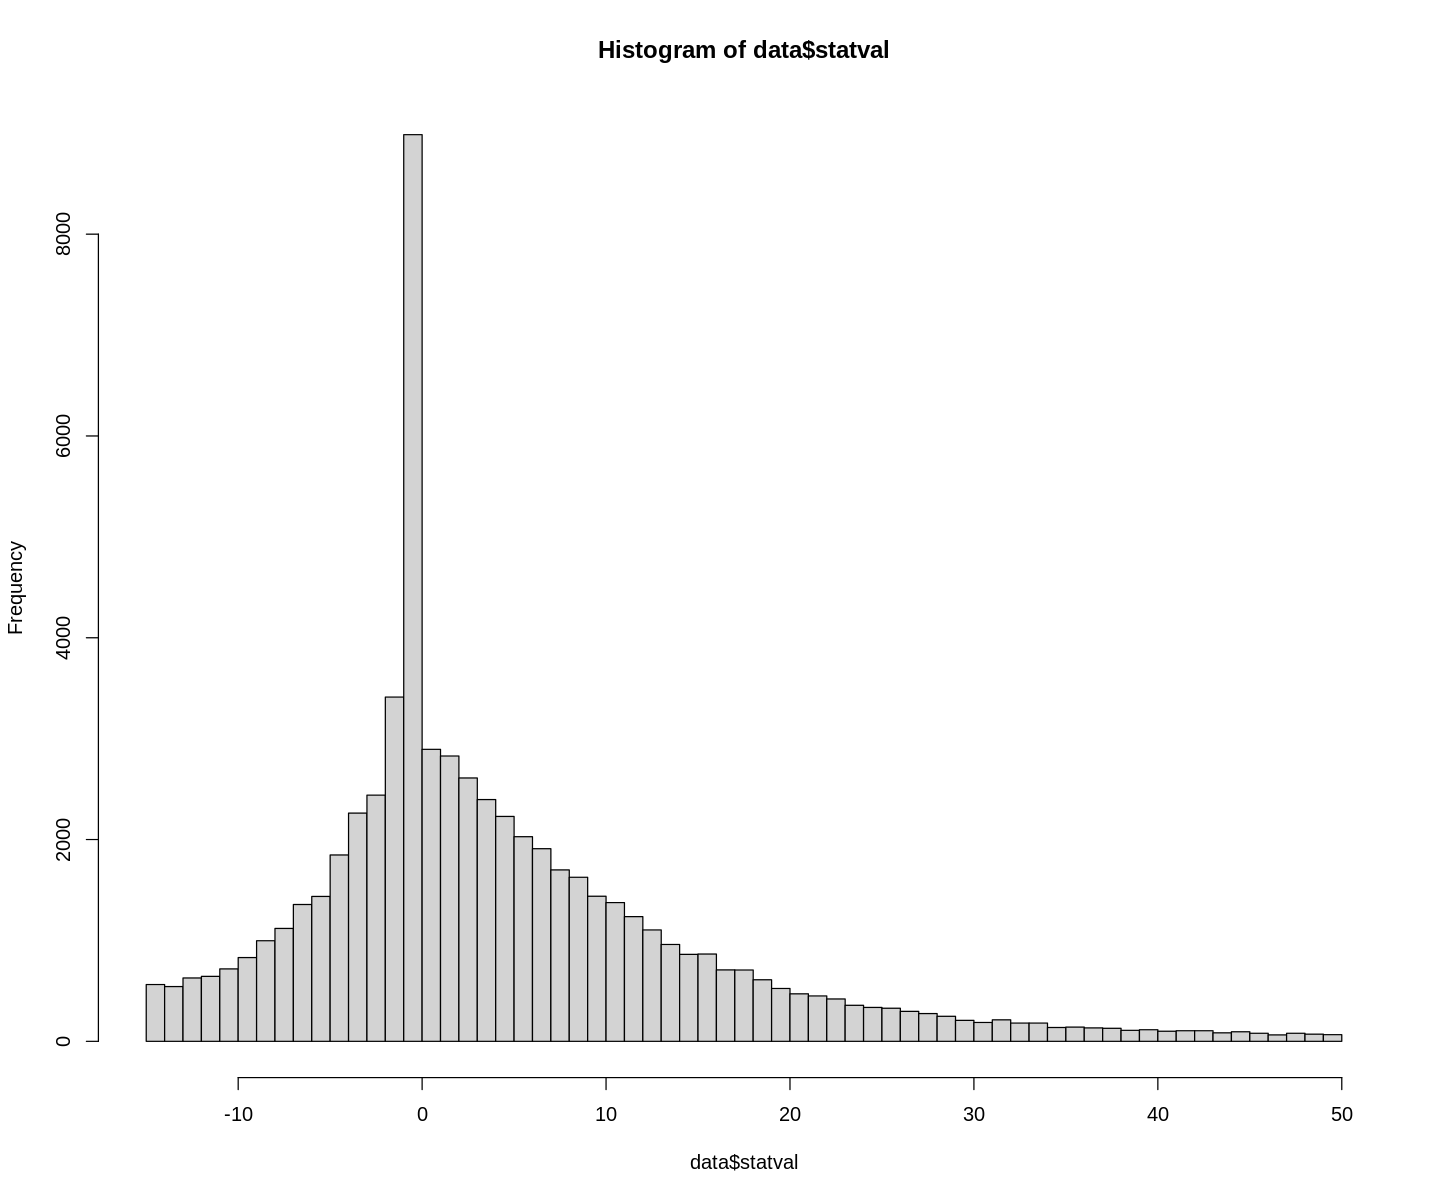

In [10]:
# Join with cleaned data. 
# Further investigation shows that we can accept small negative values too. 
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp90' and  statval >= -15 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2042       64155    -15.0000     -1.7000      1.5000      4.4814      9.1000     50.0000     10.8940 



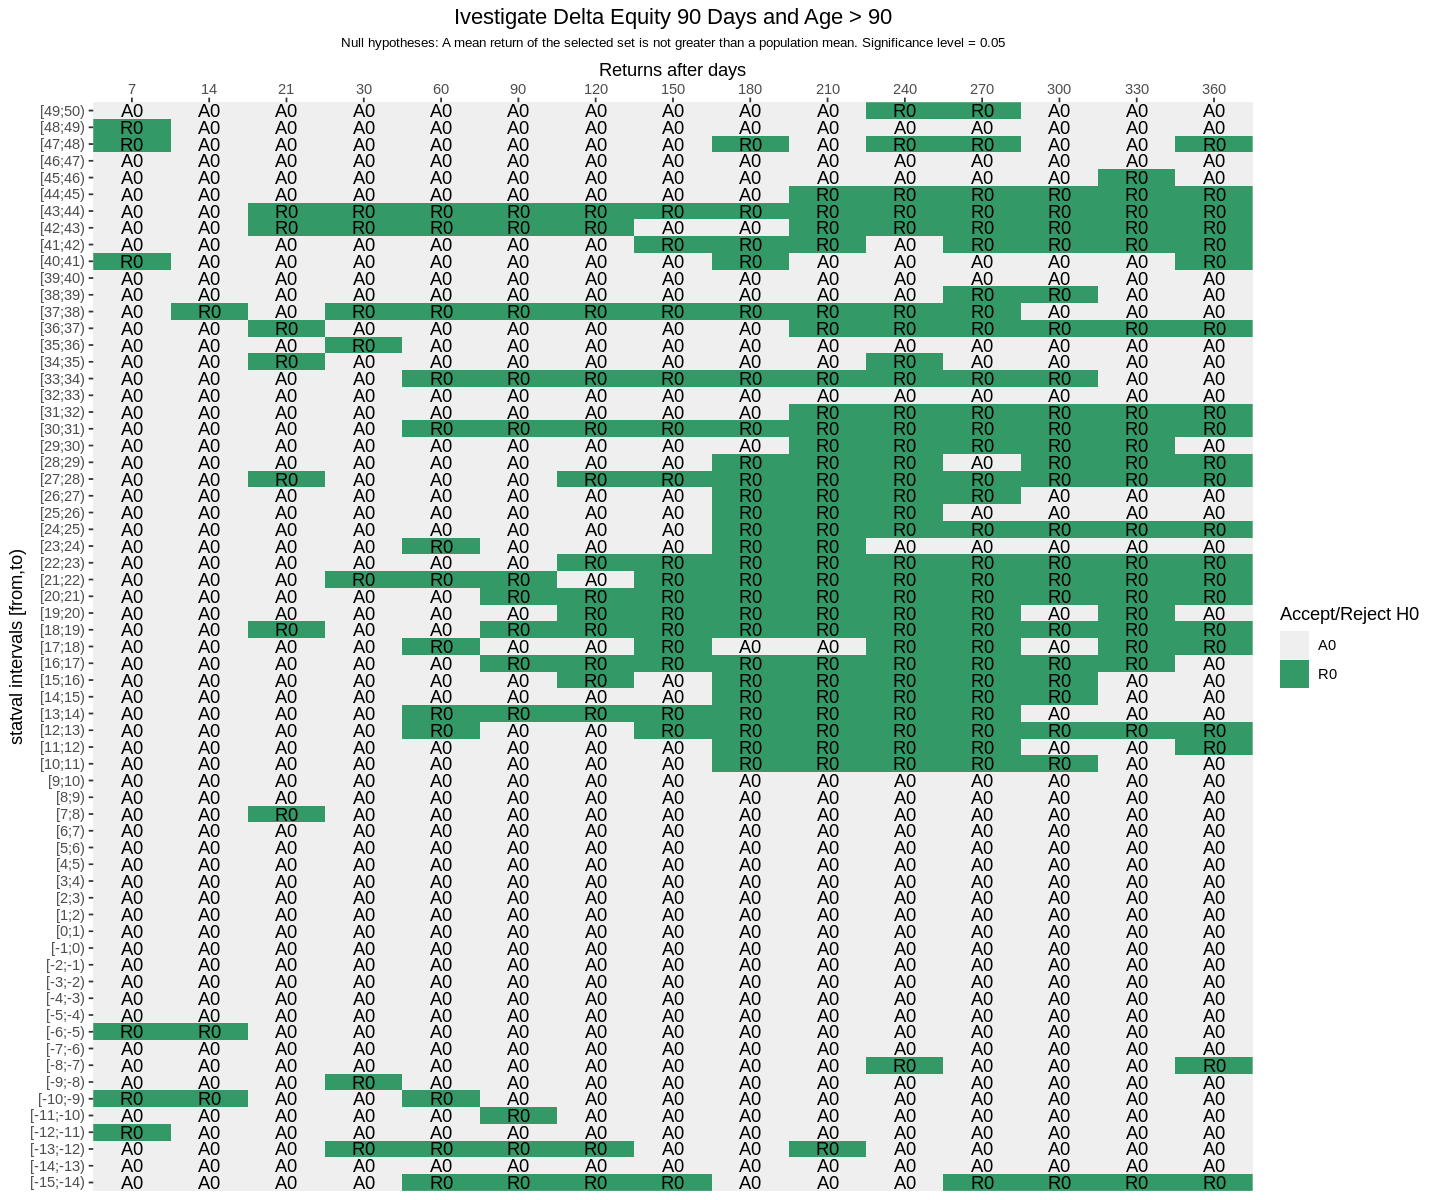

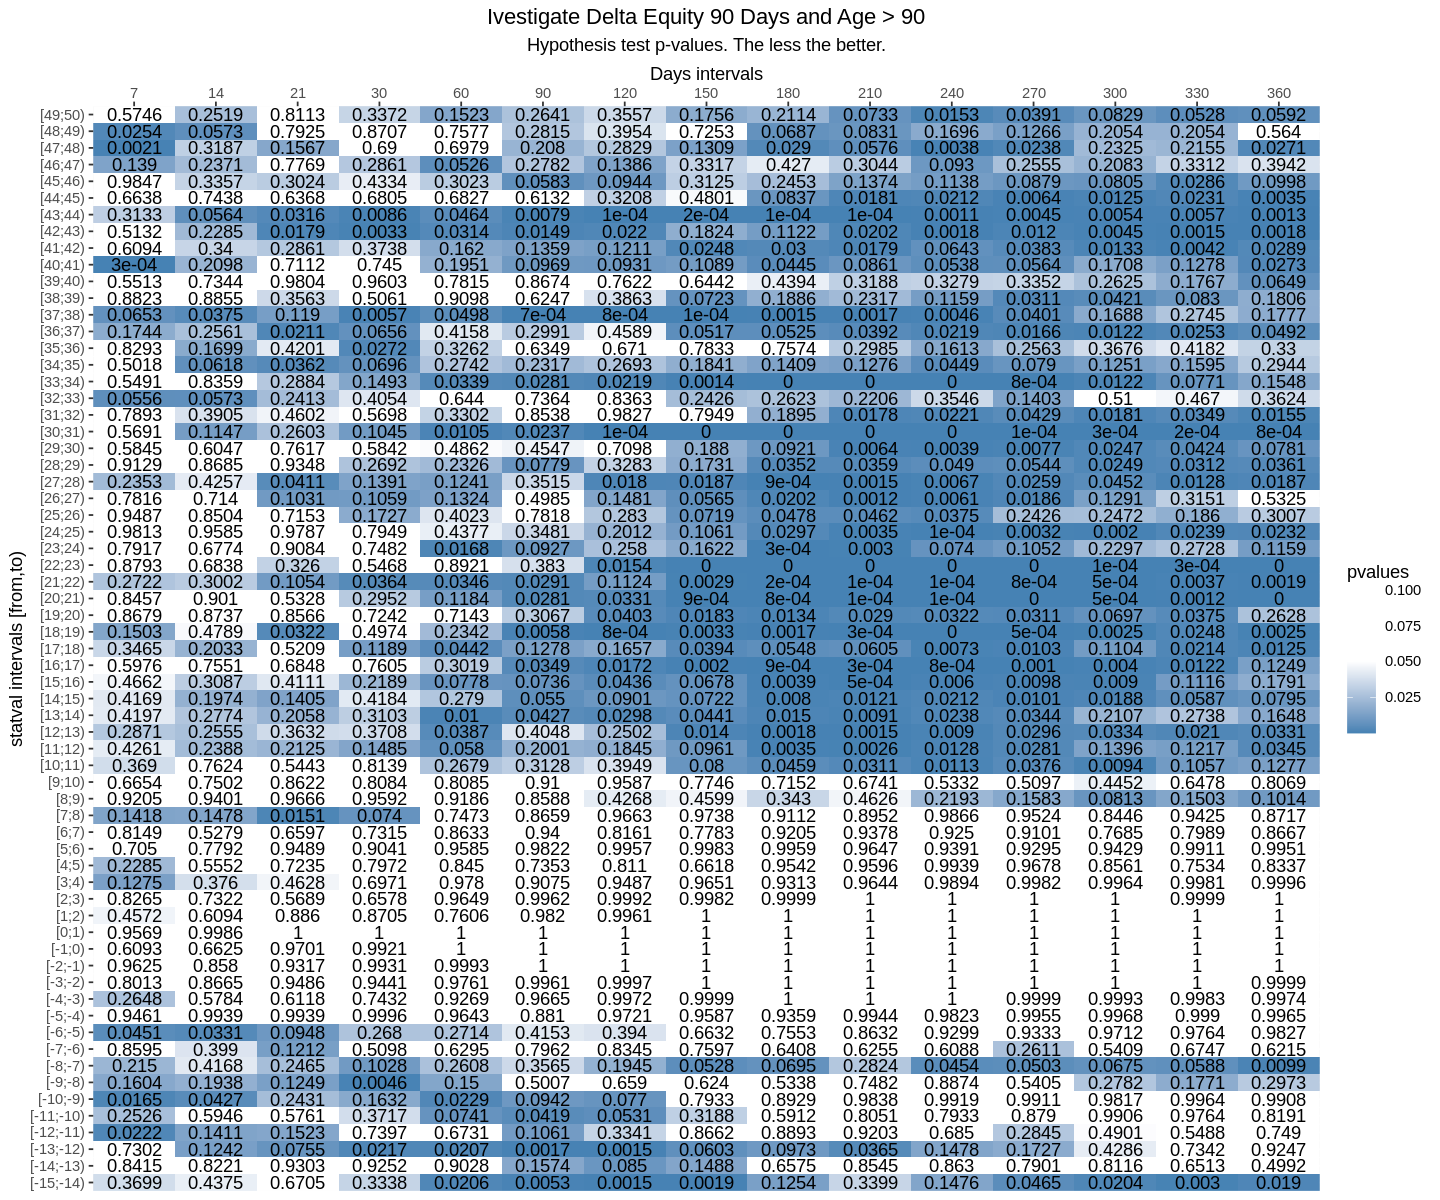

In [11]:
experiment = list(
  name = "deltaequityp90 and Age > 90",
  description = "Ivestigate Delta Equity 90 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = -15, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


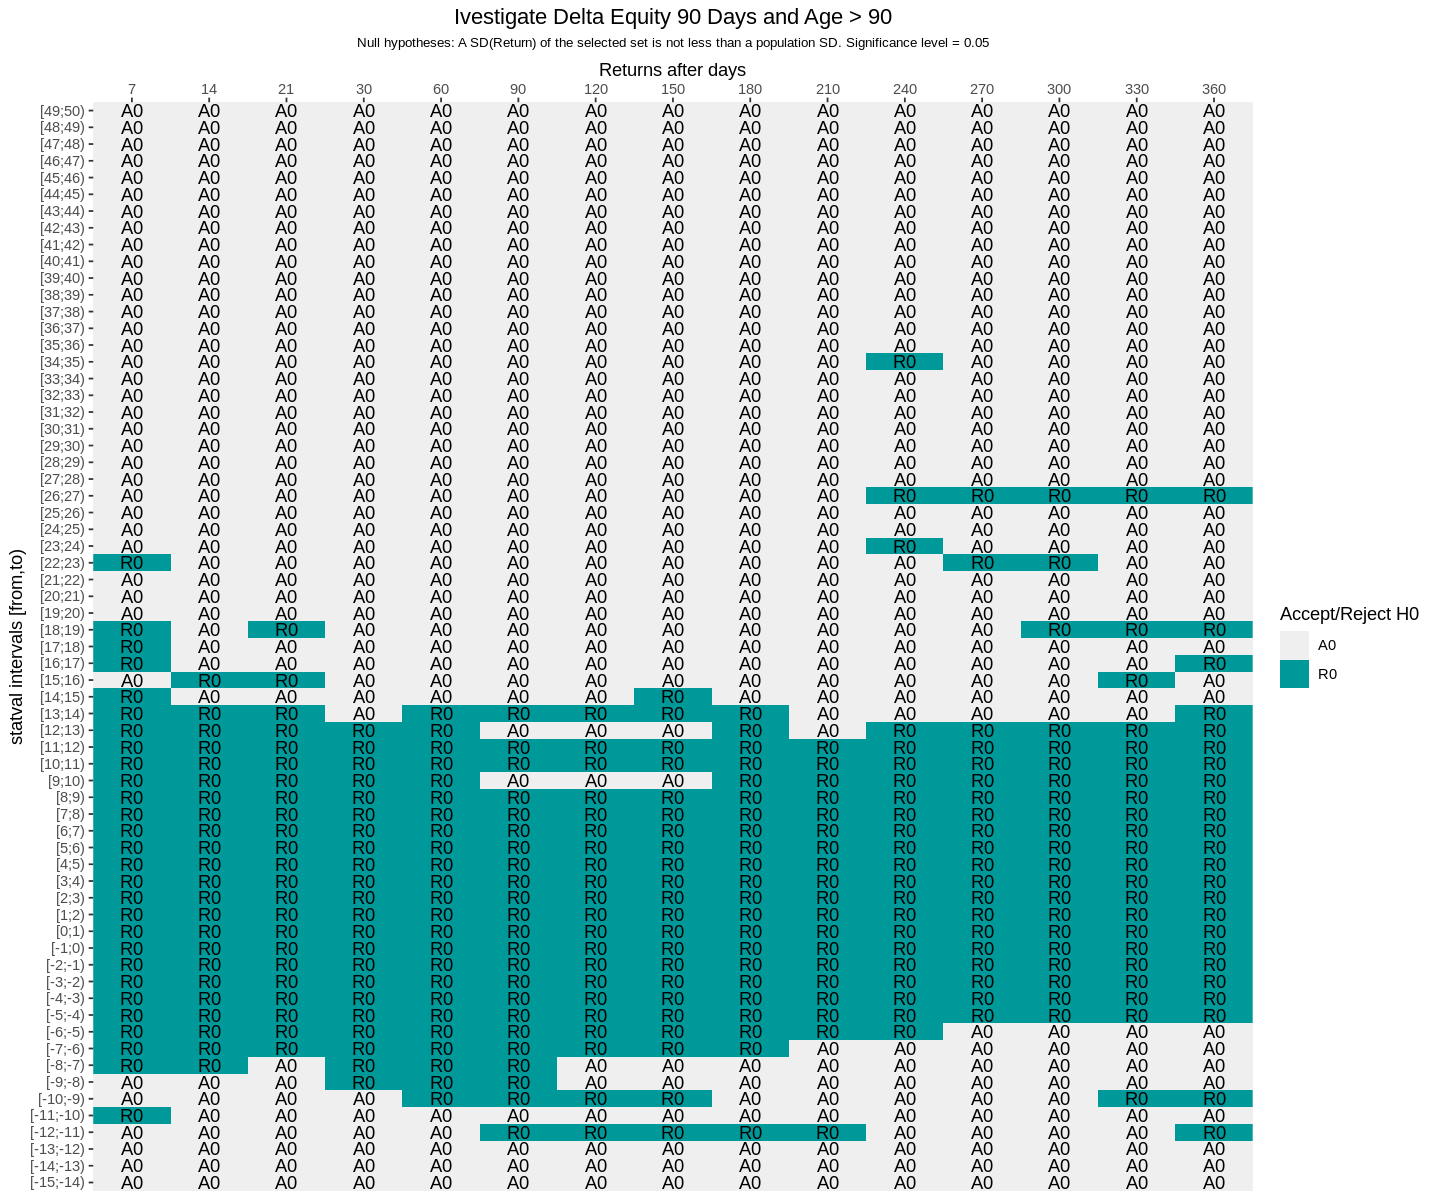

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection            Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50    61     60     58     58     48     45     42     37   
2  48 <= statval < 49    71     70     69     68     64     59     55     54   
3  47 <= statval < 48    83     80     78     77     70     63     56     54   
4  46 <= statval < 47    57     56     55     53     44     43     39     37   
5  45 <= statval < 46    82     79     79     78     74     69     60     56   
6  44 <= statval < 45    98     97     94     90     81     74     71     67   
7  43 <= statval < 44    79     79     77     76     69     64     59     55   
8  42 <= statval < 43    99     97     94     92     87     81     75     70   
9  41 <= statval < 42   106    104    100     97     89     83     76     66   
10 40 <= statval < 41    99     98     95     94     83     72     66     60   
11 39 <= statval < 40   118    112    108    103     98     89     84     79   
12 38 <= statval < 39   103    102    101     98     90     80     74     67   
13 37 <= statval < 38   134    134    132    126    117    105    101     90   
14 36 <= statval < 37   127    126    122    118    110    103     93     86   
15 35 <= statval < 36   136    131    127    122    111    104     94     83   
16 34 <= statval < 35   141    137    137    133    124    114    105     99   
17 33 <= statval < 34   181    177    174    172    156    142    133    128   
18 32 <= statval < 33   174    170    170    167    155    144    129    112   
19 31 <= statval < 32   213    210    206    201    181    168    160    136   
20 30 <= statval < 31   175    170    165    161    145    141    129    122   
21 29 <= statval < 30   214    212    209    202    186    169    159    138   
22 28 <= statval < 29   250    248    244    238    219    203    197    178   
23 27 <= statval < 28   271    269    263    261    238    220    202    183   
24 26 <= statval < 27   285    283    275    264    245    226    205    182   
25 25 <= statval < 26   335    332    325    314    283    264    235    215   
26 24 <= statval < 25   328    321    311    304    277    252    232    217   
27 23 <= statval < 24   351    342    336    325    288    265    243    218   
28 22 <= statval < 23   412    405    394    382    354    323    291    274   
29 21 <= statval < 22   450    440    430    420    387    349    322    298   
30 20 <= statval < 21   481    473    468    456    404    372    339    313   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15    851    827    804    785    703    629    565    516  
37 13 <= statval < 14    973    954    938    921    831    763    675    621  
38 12 <= statval < 13   1071   1052   1030   1011    915    832    758    688  
39 11 <= statval < 12   1249   1230   1207   1161   1041    934    831    754  
40 10 <= statval < 11   1370   1345   1310   1278   1158   1048    940    846  
41 9 <= statval < 10    1414   1382   1352   1314   1172   1070    947    851  
42 8 <= statval < 9     1590   1567   1532   1482   1333   1200   1086    974  
43 7 <= statval < 8     1694   1652   1613   1571   1410   1261   1128   1018  
44 6 <= statval < 7     1877   1824   1785   1724   1550   1379   1242   1123  
45 5 <= statval < 6     2005   1964   1902   1846   1651   1483   1306   1182  
46 4 <= statval < 5     2176   2124   2081   2021   1820   1632   1459   1333  
47 3 <= statval < 4     2390   2348   2303   2241   2002   1797   1589   1460  
48 2 <= statval < 3     2615   2550   2479   2411   2192   1988   1776   1609  
49 1 <= statval < 2     2727   2655   2592   2515   2211   1965   1748   1600  
50 0 <= statval < 1     6697   6587   6459   6281   5746   5308   4896   4512  
51 -1 <= statval < 0    5030   4870   4703   4530   4041   3611   3222   2880  
52 -2 <= statval < -1   3146   3028   2930   2803   2460   2188   1921   1692  
53 -3 <= statval < -2   2389   2299   2235   2131   1886   1667   1461   1320  
54 


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



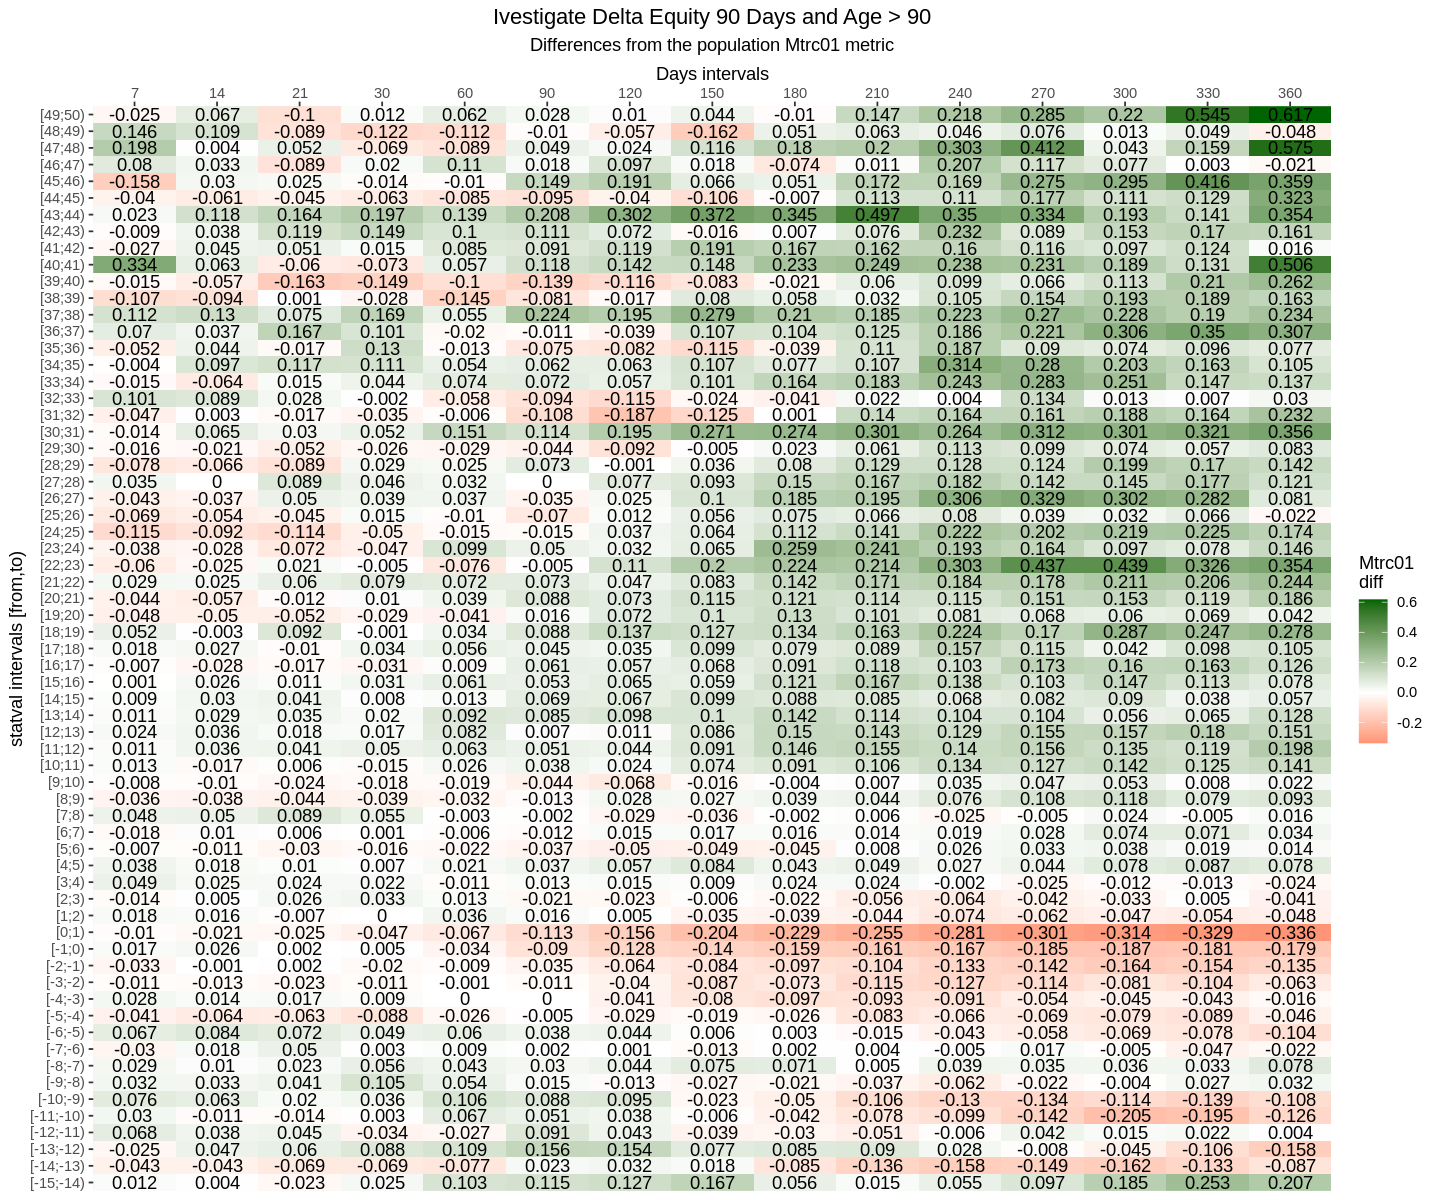

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection            Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50    51     50     48     48     38     35     33     28   
2  48 <= statval < 49    59     58     57     56     52     49     45     44   
3  47 <= statval < 48    70     67     65     64     57     50     43     42   
4  46 <= statval < 47    54     53     52     50     41     40     36     34   
5  45 <= statval < 46    71     68     68     67     63     59     51     48   
6  44 <= statval < 45    77     77     75     71     63     56     53     50   
7  43 <= statval < 44    70     70     68     67     60     55     51     47   
8  42 <= statval < 43    82     81     78     76     72     68     62     58   
9  41 <= statval < 42    83     82     78     75     67     63     57     51   
10 40 <= statval < 41    82     81     78     78     69     58     55     50   
11 39 <= statval < 40    99     94     90     85     80     73     68     65   
12 38 <= statval < 39    83     82     81     78     72     66     60     55   
13 37 <= statval < 38   106    106    105     99     90     81     78     69   
14 36 <= statval < 37    99     98     94     92     85     79     71     65   
15 35 <= statval < 36   100     96     94     92     85     81     74     66   
16 34 <= statval < 35   110    106    106    102     95     86     80     76   
17 33 <= statval < 34   131    128    126    124    111    101     95     92   
18 32 <= statval < 33   137    133    133    131    119    111    100     85   
19 31 <= statval < 32   157    155    153    149    132    121    115     98   
20 30 <= statval < 31   138    134    131    127    111    108     98     93   
21 29 <= statval < 30   157    155    154    147    133    120    112    100   
22 28 <= statval < 29   181    179    175    169    154    142    136    123   
23 27 <= statval < 28   196    195    190    189    168    155    142    127   
24 26 <= statval < 27   209    207    201    193    183    166    155    138   
25 25 <= statval < 26   227    224    219    210    189    173    155    144   
26 24 <= statval < 25   216    210    201    196    178    162    147    136   
27 23 <= statval < 24   245    238    233    225    202    181    165    150   
28 22 <= statval < 23   261    256    248    237    219    198    175    165   
29 21 <= statval < 22   275    269    262    254    231    206    188    171   
30 20 <= statval < 21   296    291    288    277    242    221    204    187   
⋮  ⋮                    ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮     
36 14 <= statval < 15   463    449    435    423    377    335    305    275   
37 13 <= statval < 14   482    476    467    458    411    375    335    309   
38 12 <= statval < 13   501    490    476    463    414    362    329    306   
39 11 <= statval < 12   567    558    545    519    463    408    369    332   
40 10 <= statval < 11   581    569    553    537    481    437    394    352   
41 9 <= statval < 10    615    601    592    572    499    449    395    350   
42 8 <= statval < 9     655    645    629    604    536    471    423    383   
43 7 <= statval < 8     683    665    647    627    555    494    437    388   
44 6 <= statval < 7     727    702    686    657    577    508    442    392   
45 5 <= statval < 6     748    731    710    688    609    538    473    419   
46 4 <= statval < 5     771    742    724    702    623    543    487    436   
47 3 <= statval < 4     789    767    747    726    631    566    496    452   
48 2 <= statval < 3     813    784    763    734    653    589    522    460   
49 1 <= statval < 2     834    812    787    756    651    560    491    441   
50 0 <= statval < 1     902    878    849    805    690    619    551    482   
51 -1 <= statval < 0    949    911    879    845    731    634    557    488   
52 -2 <= statval < -1   844    804    774    732    639    569    487    434   
53 -3 <= statval < -2   782    746    724    679    594    516    448    397   
54 

### Discussion

Daniil: Use the DeltaEquity90Days attribute with a negative value, this makes it possible to send good strategies in the top, despite a slight drawdown (7%). 
The idea is that everyone has loss periods, and this is not a reason to downgrade too much.